In [1]:
import os
import numpy as np
import pandas as pd
import time
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.utils import shuffle
import platform
import re
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df0 = pd.read_excel("E:/CNSI_project/demo_and_data_5.0/Processed_data/Extr_val/aim2_dataset_ExVal_v2.0_mentalstatus1.xlsx")
df0 = df0.iloc[:,:-1]
df0

subject_id  hadm_id   chartdate  B_Albumin  B_AlkalinePhosphatase  \
0             31   128652  2108-08-23        NaN                    NaN   
1             78   100536  2177-02-14        3.1                  129.0   
2             92   142807  2122-12-17        NaN                    NaN   
3             93   160481  2128-03-23        NaN                    NaN   
4            110   154943  2110-06-02        NaN                  126.0   
...          ...      ...         ...        ...                    ...   
1371       32626   149195  2107-06-11        NaN                    NaN   
1372       32656   153884  2186-01-07        NaN                    NaN   
1373       32745   145060  2151-07-22        NaN                    NaN   
1374       32749   138488  2171-10-17        NaN                    NaN   
1375       32786   165351  2152-11-28        NaN                    NaN   

      B_Calcium  B_Chloride  B_LactateDehydrogenase  B_Phosphate  \
0           8.1       103.0                   204.0          2.2   
1           8.0       106.0                     NaN          3.3   
2           NaN       109.0                     NaN          NaN   
3           NaN       104.0                     NaN          NaN   
4           NaN       106.0                     NaN          NaN   
...         ...         ...                     ...          ...   
1371        9.0        96.0                     NaN          3.3   
1372        NaN         NaN                     NaN          NaN   
1373        9.0       111.0                     NaN          2.8   
1374       10.2        98.0                     NaN          3.5   
1375        8.3       106.0                     NaN          3.8   

      B_UreaNitrogen  ...  C_Protein  C_Eosinophils  C_Polys     C_RBC  age  \
0               11.0  ...       63.0            NaN     37.0  435000.0   72   
1                9.0  ...       37.0            NaN      0.0       6.0   49   
2                NaN  ...      142.0            NaN      0.0      94.0    0   
3                NaN  ...      101.0            3.0     43.0      42.0    0   
4                NaN  ...      109.0            NaN      1.0     153.0    0   
...              ...  ...        ...            ...      ...       ...  ...   
1371            16.0  ...      327.0            NaN     76.0       0.0   33   
1372             NaN  ...      167.0            NaN      7.0   43350.0    0   
1373            13.0  ...       35.0            NaN     74.0    8850.0   64   
1374            11.0  ...       26.0            NaN     13.0       8.0   22   
1375            29.0  ...       27.0            NaN      0.0       4.0   53   

       resprate  acuity                                    Chief Complaint  \
0     12.076923     NaN  movement pupils sz activity, s sz, s, sinifica...   
1     17.066667     NaN  headache hyper hypertens let lethargic sleepy ...   
2           NaN     NaN  whiteions, edema, br abrasion, hyperirubmia, h...   
3           NaN     NaN  mumur sl jaundice, opening, hyperirub status, ...   
4           NaN     NaN  sis rash, discomfort headache, rash, headache ...   
...         ...     ...                                                ...   
1371  17.357143     NaN  waking disorienteras, pain turn, propiorecepti...   
1372        NaN     NaN  tachypnea, scr pectus a b, headache overt s + ...   
1373  25.266667     NaN  nal nonpurposeful movements, opening eyes rous...   
1374  33.040000     NaN  pupil, asleep awake awake, cough secretions co...   
1375  20.230769     NaN  opens withdraw pressure weakness r, spontateou...   

                                              icd_title  hospital_expire_flag  
0     Antineoplastic and immunosuppressive drugs cau...                     1  
1     Accidental poisoning by benzodiazepine-based t...                     0  
2     Acidosis; Anemia of prematurity; Chronic respi...                     0  
3     25-26 completed weeks of gestation; Anemia of ...                     0  
4 

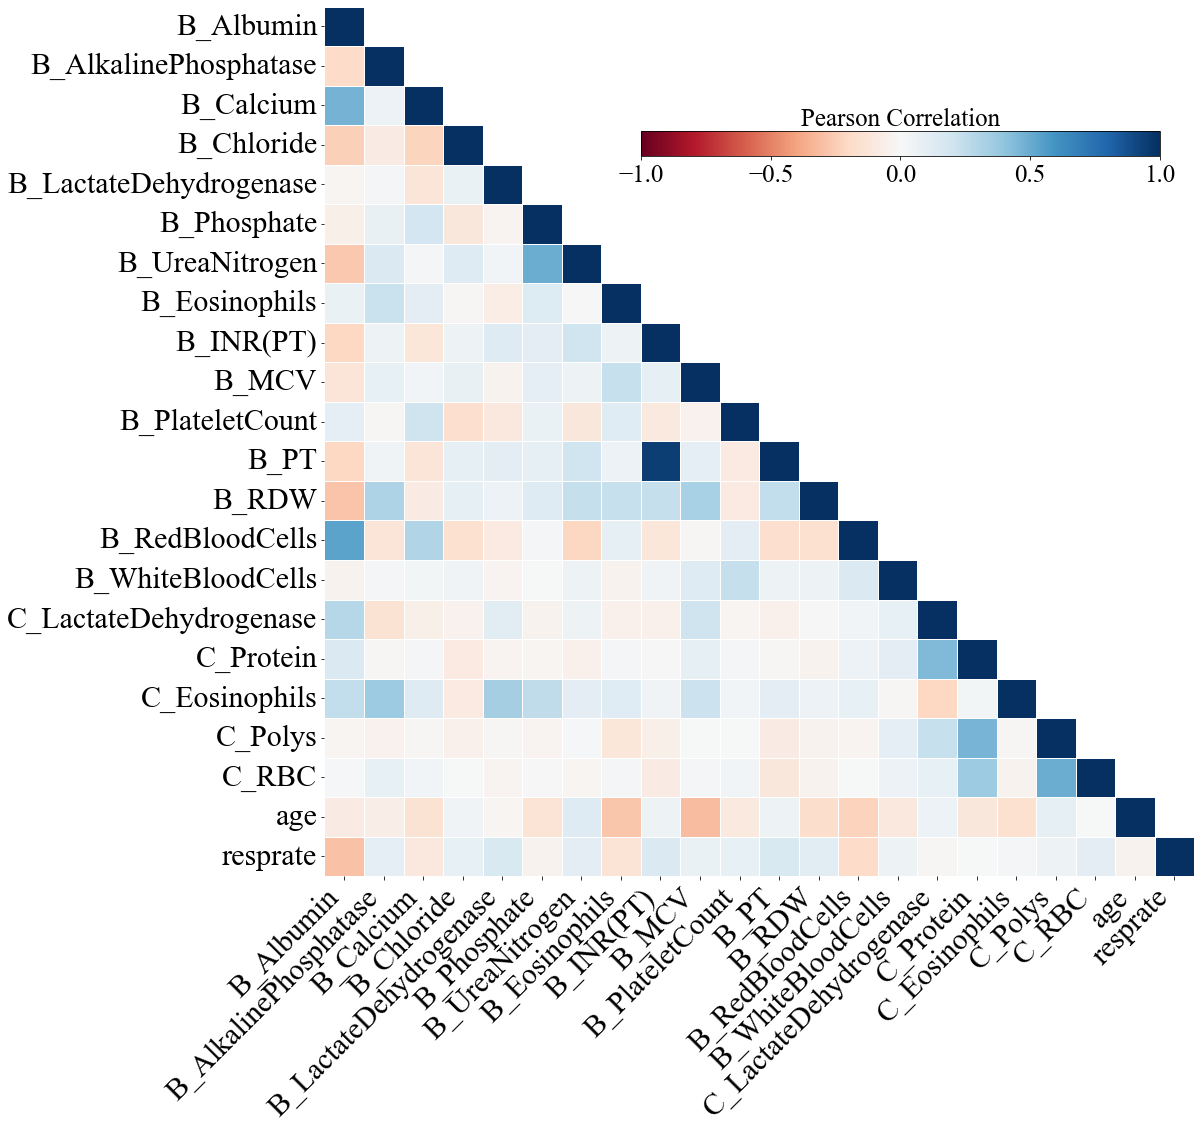

In [6]:
df_input1 = df0.iloc[:,3:-3]
#correlation
correlation = df_input1.corr()
#tick labels
matrix_cols = correlation.columns.tolist()
#convert to array
corr_array  = np.array(correlation)

non_empty_columns = ~np.all(np.isnan(corr_array), axis=0)
corr_array_filtered = corr_array[non_empty_columns][:, non_empty_columns]
FullNamesList_filtered = [name for i, name in enumerate(matrix_cols) if non_empty_columns[i]]

# from pylab import mpl
import matplotlib as mpl
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'
mpl.rcParams['font.sans-serif'] = 'Times New Roman'
font = {'family': 'Times New Roman',
            'color': 'k',
            'weight': 'normal',
            'size': 25,}

mask = np.ones_like(corr_array_filtered, dtype=bool)
mask[np.tril_indices_from(mask)] = False

fig = plt.figure(figsize=(16, 16))
ax = sns.heatmap(
    data=corr_array_filtered,
    cmap='RdBu',
    square=True,
    mask=mask,
    linewidths=1,
    linecolor="white",
    annot_kws={"size": 30},
    xticklabels=FullNamesList_filtered,
    yticklabels=FullNamesList_filtered,
    vmin=-1,
    vmax=1, 
    cbar=False,
)
plt.xticks(
    [i + 0.5 for i in range(len(FullNamesList_filtered))],
    FullNamesList_filtered,
    rotation=45,
    fontsize=30,
    ha='right',
    fontname="Times New Roman"
) 
plt.yticks(
    [i + 0.5 for i in range(len(FullNamesList_filtered))],
    FullNamesList_filtered,
    rotation=0,
    fontsize=30,
    ha='right'
)

position = fig.add_axes([0.41, 0.75, 0.45, 0.022]) 
cbar1 = plt.colorbar(ax.collections[0], cax=position, orientation='horizontal')
cbar1.ax.tick_params(labelsize=25)
cbar1.ax.set_title(r'Pearson Correlation', fontdict=font)

plt.savefig('E:CNSI_project/demo_and_data_5.0/figure_in_paper/ExVal/Correlation_Matrix1.svg', dpi=300, bbox_inches='tight')

plt.show()

# 1, Chief Complaint

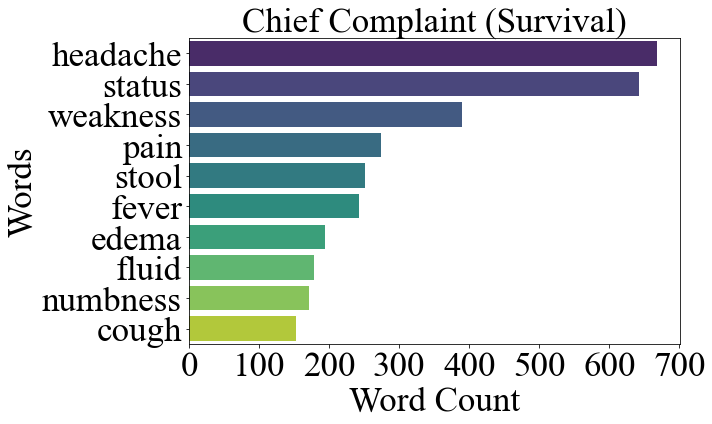

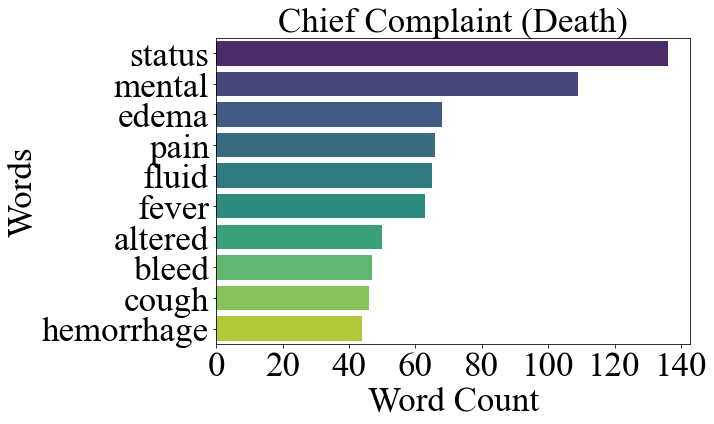

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

data = df0.copy()
data['Chief Complaint'] = data['Chief Complaint'].str.lower()

# Define a function to remove 'nan' from a string
def remove_nan(text):
    if pd.isna(text):
        return ''
    return re.sub(r'\bnan\b', '', str(text), flags=re.IGNORECASE).strip()

# Apply the function to the 'Chief Complaint' column
data['Chief Complaint'] = data['Chief Complaint'].apply(remove_nan)

# Group the data by label and concatenate the text data for each group
groups = data.groupby('hospital_expire_flag')['Chief Complaint'].apply(lambda x: ' '.join(str(i) for i in x))

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the text data
count_matrix = vectorizer.fit_transform(groups)

# Get the feature names (words)
words = vectorizer.get_feature_names_out()

# Convert the count_matrix to a DataFrame
count_df = pd.DataFrame(count_matrix.T.toarray(), index=words, columns=groups.index)

d_outcome = {0: "Survival", 1: "Death"}

# Function to plot top word counts
def plot_top_word_counts(count_df, group, top_n=10):
    top_words = count_df[group].sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
    plt.title(f'Chief Complaint ({d_outcome[group]})', fontsize=35, fontname='Times New Roman')
    plt.xlabel('Word Count', fontsize=35, fontname='Times New Roman')
    plt.ylabel('Words', fontsize=35, fontname='Times New Roman')
    plt.xticks(fontsize=35, fontname='Times New Roman')
    plt.yticks(fontsize=35, fontname='Times New Roman')
    plt.tight_layout()

    path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper/ExVal/WordCount", f"Chief_{d_outcome[group]}.tif")
    plt.savefig(path, dpi=300, bbox_inches='tight')
    
    plt.show()

# Plot top word counts for each group
plot_top_word_counts(count_df, 0)
plot_top_word_counts(count_df, 1)

## Statistics after conversion to TF-IDF

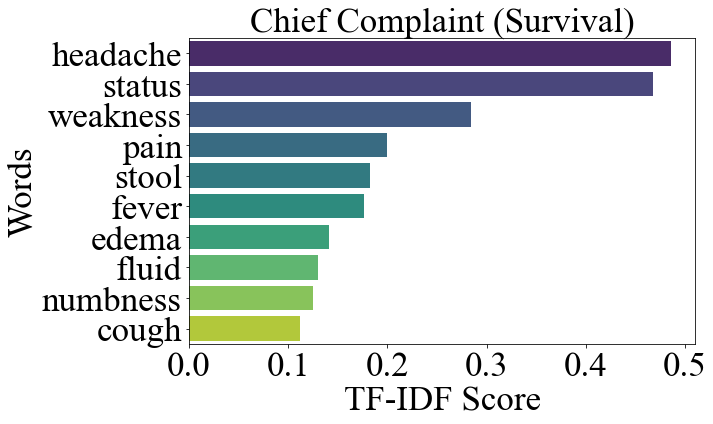

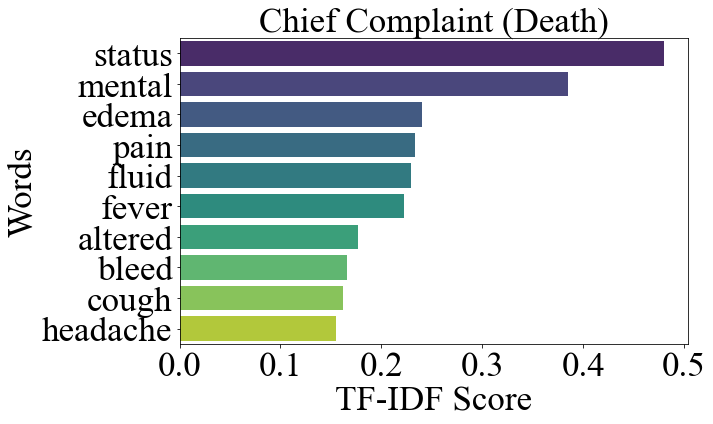

In [6]:
data = df0.copy()

data['Chief Complaint'] = data['Chief Complaint'].str.lower()

# Define a function to remove 'nan' from a string
def remove_nan(text):
    if pd.isna(text):
        return ''
    return re.sub(r'\bnan\b', '', str(text), flags=re.IGNORECASE).strip()

# Apply the function to the 'Chief Complaint' column
data['Chief Complaint'] = data['Chief Complaint'].apply(remove_nan)

# Group the data by label and concatenate the text data for each group
groups = data.groupby('hospital_expire_flag')['Chief Complaint'].apply(lambda x: ' '.join(str(i) for i in x))

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(groups)

# Get the feature names (words)
words = vectorizer.get_feature_names_out()

# Convert the tfidf_matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=words, columns=groups.index)

d_outcome = {0:"Survival",1:"Death"}

# Function to plot top TF-IDF words
def plot_top_tfidf_words(tfidf_df, group, top_n=10):
    top_words = tfidf_df[group].sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
#     plt.title(f'Top {top_n} TF-IDF Words for Group {group}', fontsize=35, fontweight='bold', fontname='Times New Roman')
    plt.title(f'Chief Complaint ({d_outcome[group]})', fontsize=35, fontname='Times New Roman')
    plt.xlabel('TF-IDF Score', fontsize=35, fontname='Times New Roman')
    plt.ylabel('Words', fontsize=35, fontname='Times New Roman')
    plt.xticks(fontsize=35, fontname='Times New Roman')
    plt.yticks(fontsize=35, fontname='Times New Roman')
    plt.tight_layout()

    path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper/ExVal/TFIDF", f"Chief_{d_outcome[group]}.tif")
    plt.savefig(path, dpi=300, bbox_inches='tight')

# Plot top TF-IDF words for each group
plot_top_tfidf_words(tfidf_df, 0)
plot_top_tfidf_words(tfidf_df, 1)

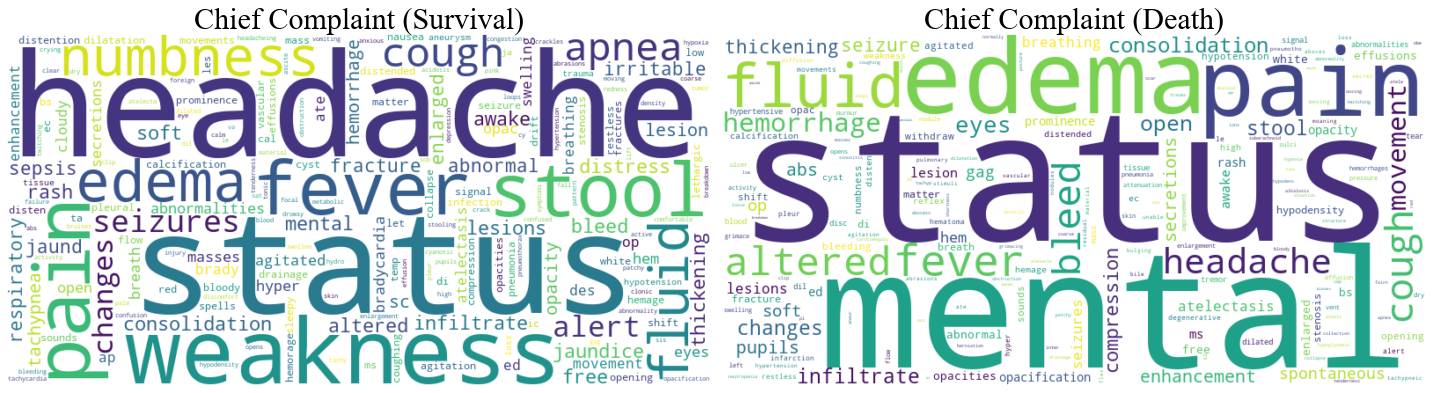

In [7]:
# Word cloud for each group
d_outcome = {0:"Survival",1:"Death"}
def plot_wordclouds_side_by_side(tfidf_df, groups):
    fig, axs = plt.subplots(1, len(groups), figsize=(20, 10))
    
    for i, group in enumerate(groups):
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(tfidf_df[group].to_dict())
        axs[i].imshow(wordcloud, interpolation='bilinear')
#         axs[i].set_title(f'Word Cloud for Group {group}', fontsize=14, fontweight='bold')
        axs[i].set_title(f"Chief Complaint ({d_outcome[group]})", fontsize=30, fontname='Times New Roman')
        axs[i].axis('off')
    
    plt.tight_layout()

    path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper/ExVal/cloud_count", f"Chief.tif")
    plt.savefig(path, dpi=300, bbox_inches='tight')
    
    plt.show()

# Plot word clouds for each group side by side
plot_wordclouds_side_by_side(count_df, [0, 1])

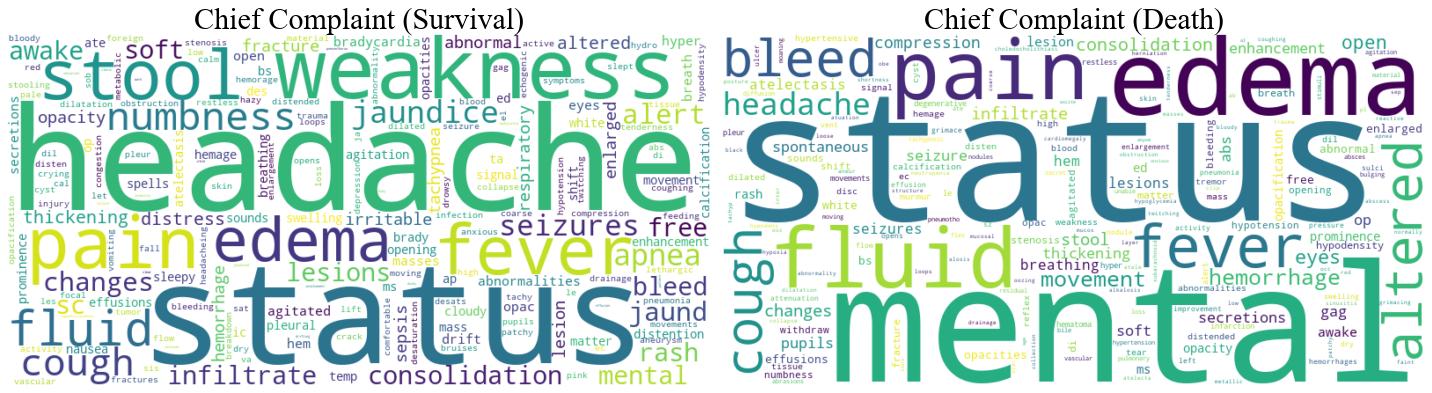

In [9]:
# Word cloud for each group
d_outcome = {0:"Survival",1:"Death"}
def plot_wordclouds_side_by_side(tfidf_df, groups):
    fig, axs = plt.subplots(1, len(groups), figsize=(20, 10))
    
    for i, group in enumerate(groups):
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(tfidf_df[group].to_dict())
        axs[i].imshow(wordcloud, interpolation='bilinear')
#         axs[i].set_title(f'Word Cloud for Group {group}', fontsize=14, fontweight='bold')
        axs[i].set_title(f"Chief Complaint ({d_outcome[group]})", fontsize=30, fontname='Times New Roman')
        axs[i].axis('off')
    
    plt.tight_layout()

    path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper/ExVal/cloud", f"Chief.tif")
    plt.savefig(path, dpi=300, bbox_inches='tight')
    
    plt.show()

# Plot word clouds for each group side by side
plot_wordclouds_side_by_side(tfidf_df, [0, 1])

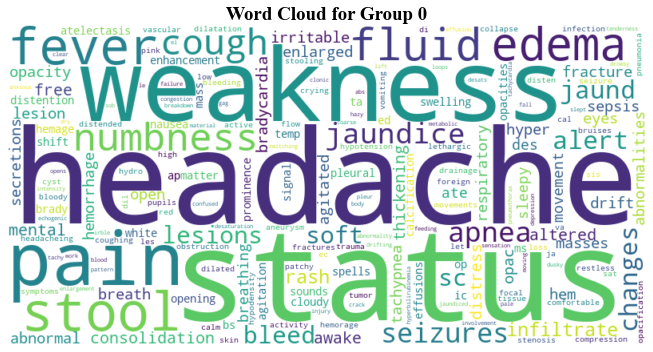

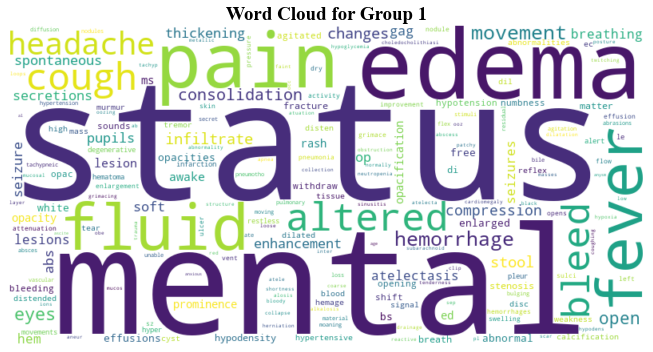

In [43]:
# Word cloud for each group
def plot_wordcloud(tfidf_df, group):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(tfidf_df[group].to_dict())
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Group {group}', fontsize=19, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot word clouds for each group
plot_wordcloud(tfidf_df, 0)
plot_wordcloud(tfidf_df, 1)

# 2, ICD text

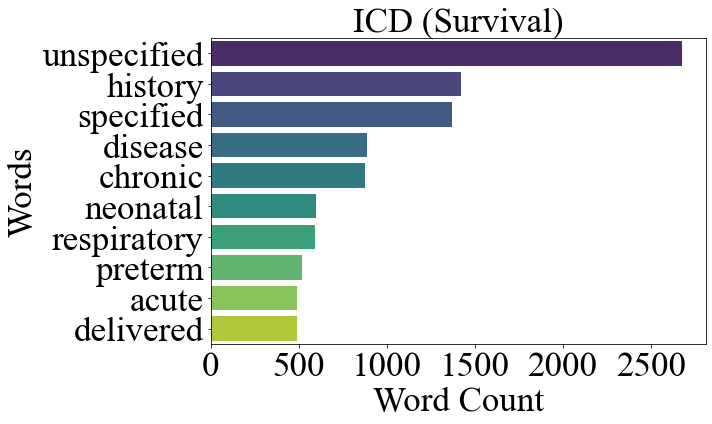

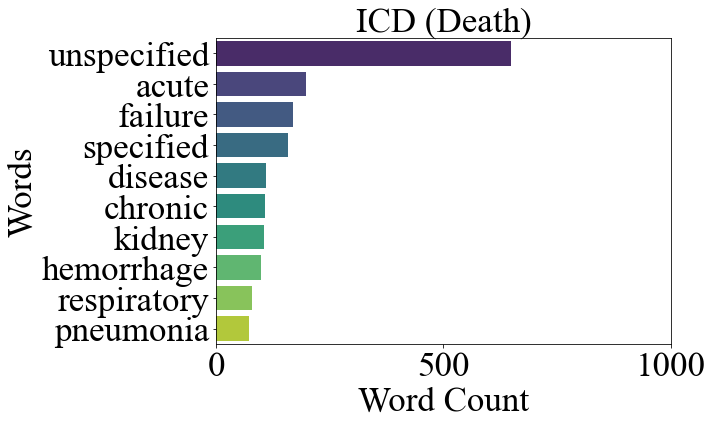

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

data = df0.copy()
data['icd_title'] = data['icd_title'].str.lower()

# Define a function to remove 'nan' from a string
def remove_nan(text):
    if pd.isna(text):
        return ''
    return re.sub(r'\bnan\b', '', str(text), flags=re.IGNORECASE).strip()

# Apply the function to the 'Chief Complaint' column
data['icd_title'] = data['icd_title'].apply(remove_nan)

# Group the data by label and concatenate the text data for each group
groups = data.groupby('hospital_expire_flag')['icd_title'].apply(lambda x: ' '.join(str(i) for i in x))

# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the text data
count_matrix = vectorizer.fit_transform(groups)

# Get the feature names (words)
words = vectorizer.get_feature_names_out()

# Convert the count_matrix to a DataFrame
count_df = pd.DataFrame(count_matrix.T.toarray(), index=words, columns=groups.index)

d_outcome = {0: "Survival", 1: "Death"}

# Function to plot top word counts
def plot_top_word_counts(count_df, group, top_n=10):
    top_words = count_df[group].sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
    plt.title(f'ICD ({d_outcome[group]})', fontsize=35, fontname='Times New Roman')
    plt.xlabel('Word Count', fontsize=35, fontname='Times New Roman')
    plt.ylabel('Words', fontsize=35, fontname='Times New Roman')
    plt.xticks(fontsize=35, fontname='Times New Roman')
    plt.yticks(fontsize=35, fontname='Times New Roman')
    if group == 1:
        plt.xticks(ticks=range(0, max(top_words.values) + 500, 500), fontsize=35, fontname='Times New Roman')
    plt.tight_layout()

    path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper/ExVal/WordCount", f"ICD_{d_outcome[group]}.tif")
    plt.savefig(path, dpi=300, bbox_inches='tight')
    
    plt.show()

# Plot top word counts for each group
plot_top_word_counts(count_df, 0)
plot_top_word_counts(count_df, 1)

## Statistics after conversion to TF-IDF

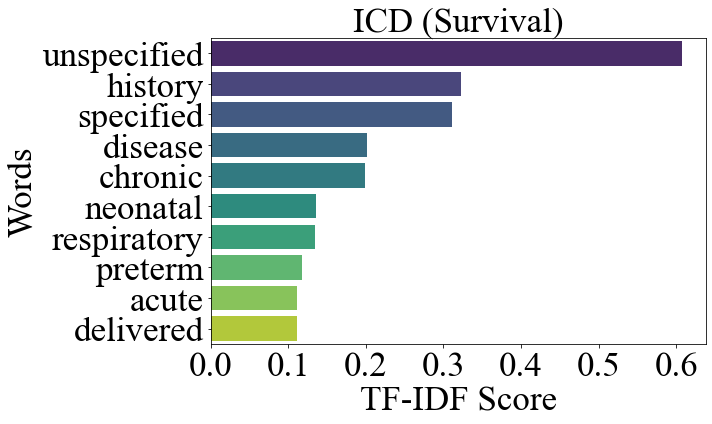

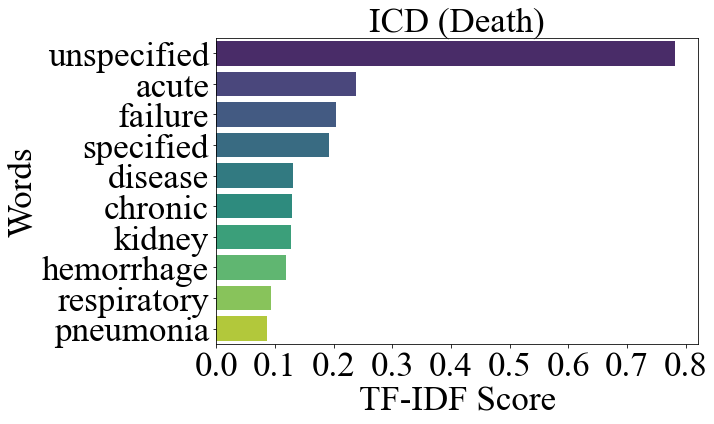

In [10]:
data = df0.copy()

data['icd_title'] = data['icd_title'].str.lower()

# Define a function to remove 'nan' from a string
def remove_nan(text):
    if pd.isna(text):
        return ''
    return re.sub(r'\bnan\b', '', str(text), flags=re.IGNORECASE).strip()

# Apply the function to the 'Chief Complaint' column
data['icd_title'] = data['icd_title'].apply(remove_nan)

# Group the data by label and concatenate the text data for each group
groups = data.groupby('hospital_expire_flag')['icd_title'].apply(lambda x: ' '.join(str(i) for i in x))

# Initialize TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
tfidf_matrix = vectorizer.fit_transform(groups)

# Get the feature names (words)
words = vectorizer.get_feature_names_out()

# Convert the tfidf_matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=words, columns=groups.index)

d_outcome = {0:"Survival",1:"Death"}

# Function to plot top TF-IDF words
def plot_top_tfidf_words(tfidf_df, group, top_n=10):
    top_words = tfidf_df[group].sort_values(ascending=False).head(top_n)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=top_words.values, y=top_words.index, palette='viridis')
#     plt.title(f'Top {top_n} TF-IDF Words for Group {group}', fontsize=20, fontweight='bold')
    plt.title(f'ICD ({d_outcome[group]})', fontsize=35, fontname='Times New Roman')
    plt.xlabel('TF-IDF Score', fontsize=35, fontname='Times New Roman')
    plt.ylabel('Words', fontsize=35, fontname='Times New Roman')
    plt.xticks(fontsize=35, fontname='Times New Roman')
    plt.yticks(fontsize=35, fontname='Times New Roman')
    plt.tight_layout()

    path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper/ExVal/TFIDF", f"ICD_{d_outcome[group]}.tif")
    plt.savefig(path, dpi=300, bbox_inches='tight')
    
    plt.show()

# Plot top TF-IDF words for each group
plot_top_tfidf_words(tfidf_df, 0)
plot_top_tfidf_words(tfidf_df, 1)

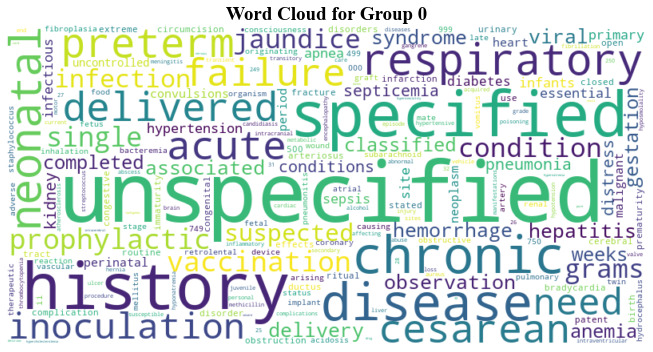

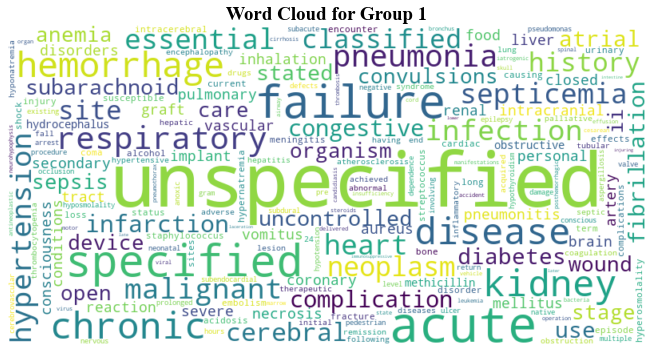

In [45]:
# Word cloud for each group
def plot_wordcloud(tfidf_df, group):
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(tfidf_df[group].to_dict())
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Group {group}', fontsize=19, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot word clouds for each group
plot_wordcloud(tfidf_df, 0)
plot_wordcloud(tfidf_df, 1)

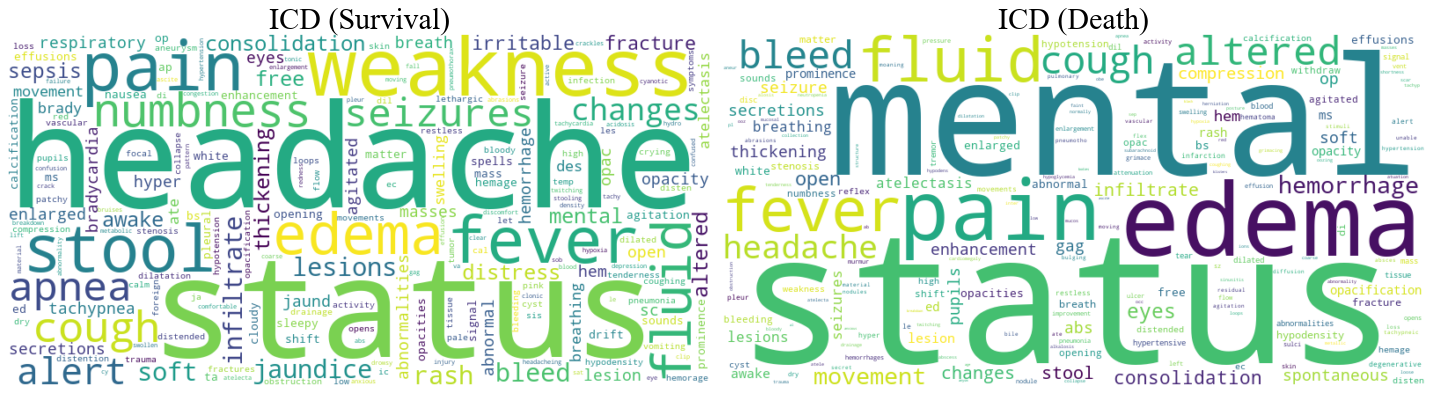

In [11]:
# Word cloud for each group
d_outcome = {0:"Survival",1:"Death"}
def plot_wordclouds_side_by_side(tfidf_df, groups):
    fig, axs = plt.subplots(1, len(groups), figsize=(20, 10))
    
    for i, group in enumerate(groups):
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(tfidf_df[group].to_dict())
        axs[i].imshow(wordcloud, interpolation='bilinear')
        axs[i].set_title(f"ICD ({d_outcome[group]})", fontsize=30, fontname='Times New Roman')
        axs[i].axis('off')
    
    plt.tight_layout()

    path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper/ExVal/cloud_count", f"ICD.tif")
    plt.savefig(path, dpi=300, bbox_inches='tight')
    
    plt.show()

# Plot word clouds for each group side by side
plot_wordclouds_side_by_side(count_df, [0, 1])

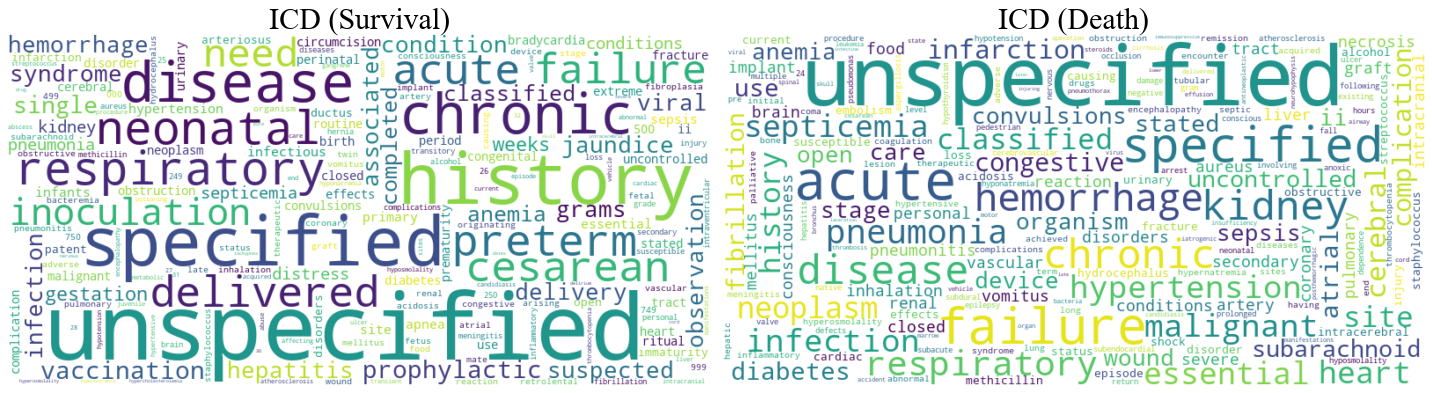

In [11]:
# Word cloud for each group
d_outcome = {0:"Survival",1:"Death"}
def plot_wordclouds_side_by_side(tfidf_df, groups):
    fig, axs = plt.subplots(1, len(groups), figsize=(20, 10))
    
    for i, group in enumerate(groups):
        wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(tfidf_df[group].to_dict())
        axs[i].imshow(wordcloud, interpolation='bilinear')
        axs[i].set_title(f"ICD ({d_outcome[group]})", fontsize=30, fontname='Times New Roman')
        axs[i].axis('off')
    
    plt.tight_layout()

    path = os.path.join("E:/CNSI_project/demo_and_data_5.0/figure_in_paper/ExVal/cloud", f"ICD.tif")
    plt.savefig(path, dpi=300, bbox_inches='tight')
    
    plt.show()

# Plot word clouds for each group side by side
plot_wordclouds_side_by_side(tfidf_df, [0, 1])